In [1]:
import pandas as pd
import xgboost
from xgboost import plot_importance
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import graphviz
from matplotlib.pylab import rcParams
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
excel_path_1 = '/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Total_Data_사본_Word제거.xlsx'

In [4]:
df_1 = pd.read_excel(excel_path_1)

In [5]:
df_1.columns

Index(['Vdo_num', 'Name', 'Channer_num', 'Sub', 'Total_Video', 'Total_Chat',
       'Chat_User', 'Chat_Num_per_user', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'No_Event_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'Dict_Positive', 'Dict_Negative',
       'Dict_Neutral', 'Dict_Positive_Rate', 'Dict_Negative_Rate',
       'Dict_Neutral_Rate', 'Dict_Score_Average', 'GPT_Positive',
       'GPT_Negative', 'GPT_Neutral', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
       'GPT_Neutral_Rate', 'GPT_Score_Average', 'KoBERT_Positive',
       'KoBERT_Negative', 'KoBERT_Neutral', 'KoBERT_Positive_Rate',
       'KoBERT_Negative_Rate', 'KoBERT_Neutral_Rate', 'KoBERT_Score_Average',
       'Tour_only'],
      dtype='object')

In [7]:
df_1.head(1)

,Vdo_num,Name,Channer_num,Sub,Total_Video,Total_Chat,Chat_User,Chat_Num_per_user,Norm_Chat,Event_Chat,...,GPT_Neutral_Rate,GPT_Score_Average,KoBERT_Positive,KoBERT_Negative,KoBERT_Neutral,KoBERT_Positive_Rate,KoBERT_Negative_Rate,KoBERT_Neutral_Rate,KoBERT_Score_Average,Tour_only
0,550543,트레이더스,85453,390000,8,3808,2442,1.559378,3578,1,...,0.200368,0.88563,2947,15,789,0.773897,0.003939,0.207195,0.8755,0


<ipython-input-96-8b4be3c0cf94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


R_Squared : 0.705241440007616
RMSE: 0.158435
Explained Variance Score : -3.055959984657486


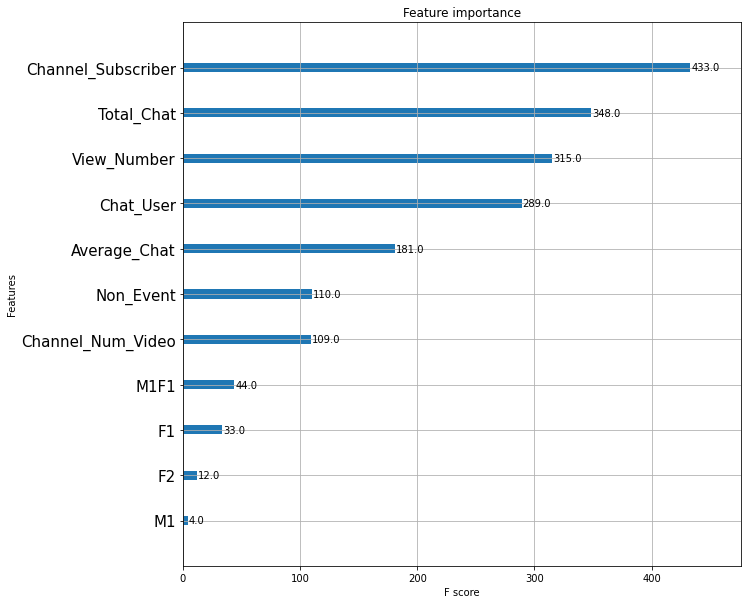

In [ ]:
# DataFrame 선택
df = df_2[['Channel_Subscriber', 'Channel_Num_Video', 'Total_Chat', 'Non_Event',
       'Chat_User', 'View_Number', 'M1', 'M2', 'F1', 'F2', 'M1F1',
       'Average_Chat', 'Rate_Hello', 'Rate_Question', 'Rate_Chat', 'Rate_ChatUser', 'Average_Score']]
df.dropna(axis=0, inplace=True)
df_x = df[['Channel_Subscriber', 'Channel_Num_Video', 'Total_Chat', 'Non_Event',
       'Chat_User', 'View_Number', 'M1', 'M2', 'F1', 'F2', 'M1F1',
       'Average_Chat', 'Rate_Hello', 'Rate_Question', 'Rate_Chat', 'Rate_ChatUser']]
df_y = df['Average_Score']
df_x = df_x.astype(int)

# Min-Max 정규화
scaler = MinMaxScaler()
# df_x[:] = scaler.fit_transform(df_x[:])

# XGBoost
X = df_x
y = df_y

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.01, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
r_sq = xgb_model.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

from xgboost import plot_importance
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 10
plot_importance(xgb_model)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)


SVR()

In [ ]:
svr.predict(X_test)

array([0.41160408, 0.36672906, 0.52278896, 0.40037474, 0.39529544,
       0.41570495, 0.37823859, 0.55484304, 0.41094554, 0.39070663,
       0.38381091, 0.41251321, 0.34136285, 0.31678079])

In [ ]:
y_pred = svr.predict(X_test)
r_sq = svr.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

NameError: ignored

Feature: 0, Score: 0.00959
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00851
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000


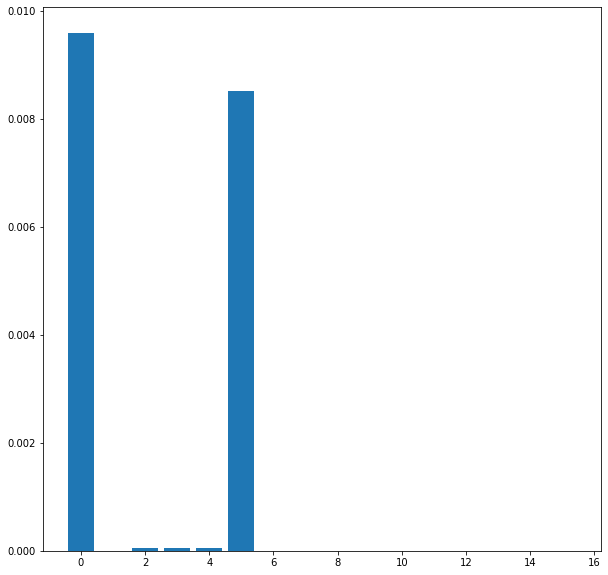

In [ ]:
results = permutation_importance(svr, X, y, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
r_sq = regr_2.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_2))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

R_Squared : 0.8106216902504016
RMSE: 0.154229
Explained Variance Score : -3.055959984657486


In [ ]:
X_train.head(1
             )

,Channel_Subscriber,Channel_Num_Video,Total_Chat,Non_Event,Chat_User,View_Number,M1,M2,F1,F2,M1F1,Average_Chat,Rate_Hello,Rate_Question,Rate_Chat,Rate_ChatUser
70,2090,13,2354,2335,227,106153,0,0,0,0,1,10,0,0,0,0


Feature: 0, Score: 0.00590
Feature: 1, Score: 0.00567
Feature: 2, Score: 0.00293
Feature: 3, Score: 0.00132
Feature: 4, Score: 0.02514
Feature: 5, Score: 0.00465
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00011
Feature: 11, Score: 0.03514
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000


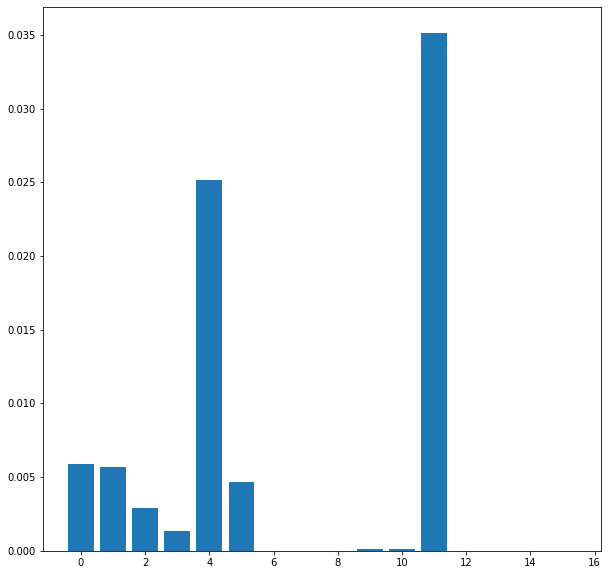

In [ ]:
results = permutation_importance(regr_2, X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()